# FAKE REVIEW NODE EMBEDDING

In [1]:
!pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.2/435.2 KB 8.8 MB/s eta 0:00:00


In [2]:
!pip install networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=56002ea4ed96b4765a7cdca960695b5866cf489a84cc27d3fca4cf56ee6a2196
  Stored in directory: /root/.cache/pip/wheels/ff/62/9e/0ed2d25fd4f5761e2d19568cda0c32716556dfa682e65ecf64
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


In [3]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import networkx as nx
import stellargraph as sg
from stellargraph import StellarGraph
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v
sns.set()

%matplotlib inline

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
pd.set_option('max_colwidth', 800)


#importing Libraies
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import collections
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
#loading dataset
df=pd.read_csv('/content/deceptive.csv')
df.head()

,deceptive,hotel,polarity,source,text,Class
0,truthful,conrad,positive,TripAdvisor,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n",1
1,truthful,hyatt,positive,TripAdvisor,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n",1
2,truthful,hyatt,positive,TripAdvisor,"This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Parking, as is usual for Chicago, was expensive but we were able to get our car out quickly (h...",1
3,truthful,omni,positive,TripAdvisor,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property! \n",1
4,truthful,hyatt,positive,TripAdvisor,"I asked for a high floor away from the elevator and that is what I got. The room was pleasantly decorated, functional and very clean. I didn't need a whole lot of service but when I did they were pleasant and prompt. I used the fitness center which was well equipped and everything was in working order. It is in a great location at one end of the Michigan Avenue shopping district. \n",1


In [6]:
df.shape

(1600, 6)

In [7]:
df['Class'].value_counts()

1    800
0    800
Name: Class, dtype: int64

### Data preprocessing

In [8]:
# dropping unnecessary columns. 
df.drop(['deceptive', 'hotel', 'polarity', 'source'], axis = 1, inplace=True)
df.head()

,text,Class
0,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n",1
1,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n",1
2,"This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Parking, as is usual for Chicago, was expensive but we were able to get our car out quickly (h...",1
3,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property! \n",1
4,"I asked for a high floor away from the elevator and that is what I got. The room was pleasantly decorated, functional and very clean. I didn't need a whole lot of service but when I did they were pleasant and prompt. I used the fitness center which was well equipped and everything was in working order. It is in a great location at one end of the Michigan Avenue shopping district. \n",1


In [9]:
# Cleaning Raw tweets
def clean_text(text):
    
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    
    #remove web address
    text = re.sub('http[s]?://\S+', '', text)

    #remove brackets and parantheses (and removing the text inside the brackets and parantheses)
    text = re.sub("[\(\[].*?[\)\]]", "", text)

    #remove punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    
    #Filter to allow only alphabets and numbers
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    #remove double spaces 
    text = re.sub('\s+', ' ', text)
    
    return text

In [10]:
# applying that into function.
df["clean_text"] = df['text'].apply(lambda x: clean_text(x))
df.head(10)

,text,Class,clean_text
0,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n",1,We stayed for a one night getaway with family on a thursday Triple AAA rate of was a steal th floor room complete with in plasma TV bose stereo voss and evian water and gorgeous bathroom Concierge was very helpful You cannot beat this location Only flaw was breakfast was pricey and service was very very slow even though there were only two other tables in the restaurant Food was very good so it was worth the wait I would return in a heartbeat A gem in chicago
1,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n",1,Triple A rate with upgrade to view room was less than which also included breakfast vouchers Had a great view of river lake Wrigley Bldg Tribune Bldg Most major restaurants Shopping Sightseeing attractions within walking distance Large room with a very comfortable bed
2,"This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Parking, as is usual for Chicago, was expensive but we were able to get our car out quickly (h...",1,This comes a little late as I m finally catching up on my reviews from the past several months A dear friend and I stayed at the Hyatt Regency in late October for one night while visiting a friend and her husband from out of town This hotel is perfect IMO Easy check in and check out Lovely clean comfortable rooms with great views of the city I know this area pretty well and it s very convenient to many downtown Chicago attractions We had dinner and went clubing with our friends around Division St We had no problems getting cabs back and forth to the Hyatt and there s even public transportation right near by but we didn t bother since we only needed cabs from and to the hotel Parking as is usual for Chicago was expensive but we were able to get our car out quickly No problems at all and...
3,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property! \n",1,The Omni Chicago really delivers on all fronts fr

In [11]:
# dropping the uncleaned text column "text"
df = df.drop(['text'], axis=1)

In [12]:
# renaming the column
df.rename(columns = {'clean_text':'text'}, inplace = True)
df.head()

,Class,text
0,1,We stayed for a one night getaway with family on a thursday Triple AAA rate of was a steal th floor room complete with in plasma TV bose stereo voss and evian water and gorgeous bathroom Concierge was very helpful You cannot beat this location Only flaw was breakfast was pricey and service was very very slow even though there were only two other tables in the restaurant Food was very good so it was worth the wait I would return in a heartbeat A gem in chicago
1,1,Triple A rate with upgrade to view room was less than which also included breakfast vouchers Had a great view of river lake Wrigley Bldg Tribune Bldg Most major restaurants Shopping Sightseeing attractions within walking distance Large room with a very comfortable bed
2,1,This comes a little late as I m finally catching up on my reviews from the past several months A dear friend and I stayed at the Hyatt Regency in late October for one night while visiting a friend and her husband from out of town This hotel is perfect IMO Easy check in and check out Lovely clean comfortable rooms with great views of the city I know this area pretty well and it s very convenient to many downtown Chicago attractions We had dinner and went clubing with our friends around Division St We had no problems getting cabs back and forth to the Hyatt and there s even public transportation right near by but we didn t bother since we only needed cabs from and to the hotel Parking as is usual for Chicago was expensive but we were able to get our car out quickly No problems at all and...
3,1,The Omni Chicago really delivers on all fronts from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue While this address in Chicago requires a high level of quality the Omni delivers Check in for myself and a whole group of people with me was under minutes the staff had plentiful recommendations for dining and events and the rooms are some of the largest you ll find at this price range in Chicago Even the standard room has a separate living area and work desk The fitness center has free weights weight machines and two rows of cardio equipment I shared the room with others and did not feel cramped in any way All in all a great property
4,1,I asked for a high floor away from the elevator and that is what I got The room was pleasantly decorated functional and very clean I didn t need a whole lot of service but when I did they were pleasant and prompt I used the fitness center which was well equipped and everything was in working order It is in a great location at one end of the Michigan Avenue shopping district


In [13]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


{'seemed', 'call', 'that', 'who', 'if', '‘ll', 'doing', 'my', 'something', 'most', 'due', 'often', 'both', 'own', 'down', 'did', 'five', 'after', 'do', 'other', 'using', 'amount', 'as', 'would', 'ten', 'namely', 'so', 'same', 'behind', 'from', 'afterwards', 'its', 'they', 'what', '’re', 'under', 'is', 'when', 'sometimes', 'name', 'sixty', 'became', 'n’t', 'hundred', 'even', 'elsewhere', '‘m', "'d", 'where', 'next', 'us', 'just', 'were', 'whom', 'two', 'give', 'nowhere', 'which', 'yourselves', 'hereby', 'hereupon', 'being', 'over', 'than', 'show', 'nothing', 'ours', 'rather', 'it', 'through', 'thereafter', 'wherever', 'three', 'thereby', 'sometime', 'we', 'was', "'ve", 'beyond', 'any', 'others', 'your', 'only', 'otherwise', 'see', 'throughout', 'yet', 'except', 'anyway', 'too', 'somehow', 'his', 'such', 'further', 'of', 'are', 'an', 'must', 'without', 'mostly', 'serious', 'please', 'various', 'hence', 'there', 'now', 'anything', 'more', 'will', 'does', 'whereafter', 'also', 'or', 'top',

In [14]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
sw_nltk.extend(['th','stay'])
print(len(sw_nltk))

181


In [16]:
# preprocessing the data (removing stopwords, convert the sentence to lower case, and also applying lemmatization to get meaningful words )
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
#stop_words = set(stopwords.words('english'))
ps=PorterStemmer()
wnl=WordNetLemmatizer()
def clean_lemma(review):
    review = review.lower()
    review = review.split()
    review = [wnl.lemmatize(word) for word in review if word not in sw_nltk]
    review = [wnl.lemmatize(word) for word in review if word not in sw_spacy]
    review = ' '.join(review)
    return review

In [17]:
# using lemmatization
df['text']=df['text'].apply(clean_lemma)
df.head()

,Class,text
0,1,stayed night getaway family thursday triple aaa rate steal floor room complete plasma tv bose stereo voss evian water gorgeous bathroom concierge helpful beat location flaw breakfast pricey service slow table restaurant food good worth wait return heartbeat gem chicago
1,1,triple rate upgrade view room le included breakfast voucher great view river lake wrigley bldg tribune bldg major restaurant shopping sightseeing attraction walking distance large room comfortable bed
2,1,come little late finally catching review past month dear friend stayed hyatt regency late october night visiting friend husband town hotel perfect imo easy check check lovely clean comfortable room great view city know area pretty convenient downtown chicago attraction dinner went clubing friend division st problem getting cab forth hyatt public transportation right near bother needed cab hotel parking usual chicago expensive able car quickly problem best got rate hotwire downright steal area chicago quality hotel
3,1,omni chicago delivers spaciousness room helpful staff prized location michigan avenue address chicago requires high level quality omni delivers check group people minute staff plentiful recommendation dining event room largest find price range chicago standard room separate living area work desk fitness center free weight weight machine row cardio equipment shared room feel cramped way great property
4,1,asked high floor away elevator got room pleasantly decorated functional clean need lot service pleasant prompt fitness center equipped working order great location end michigan avenue shopping district


### FEATURE EXTRACTION (using BAGOFWORDS)

In [18]:
x = df['text']
y = df['Class']

In [19]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1595    0
1596    0
1597    0
1598    0
1599    0
Name: Class, Length: 1600, dtype: int64

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
corpii=cv.fit_transform(x) 

In [21]:
feature_names = cv.get_feature_names()
#feature_names

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
len(feature_names)

7905

In [23]:
u1 = pd.DataFrame(corpii.toarray(), columns=feature_names)
u1.head()

,aaa,aaahed,aback,abassador,abd,ability,able,abound,abrupt,abruptly,...,yucky,yummo,yummy,yunan,yup,zagat,zest,zipped,zone,zoo
0,0.217034,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.090437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2)
tfidf_2d = tsne.fit_transform(u1)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Data visualization

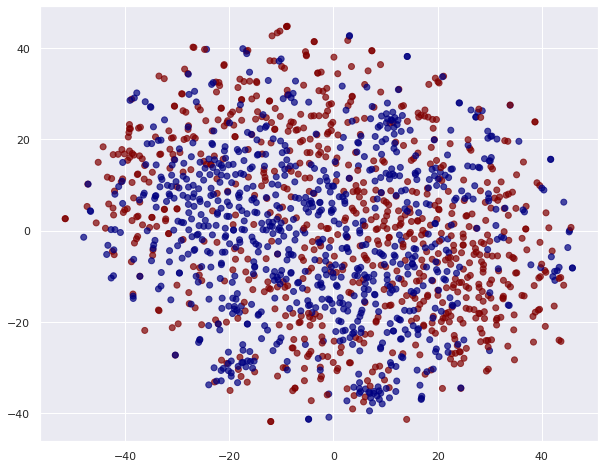

In [25]:
# draw the points
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(df['Class']))}
node_colours = [label_map[target] for target in df['Class']]

plt.figure(figsize=(10, 8))
plt.scatter(
    tfidf_2d[:, 0],
    tfidf_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)

### FEATURE SELECTION (using chi square)

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2000)
X_kbest_features = chi2_features.fit_transform(u1, y)

In [27]:
chi_support = chi2_features.get_support()

In [28]:
chi_feature = u1.loc[:,chi_support].columns.tolist()

In [29]:
X_kbest_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
u3 = pd.DataFrame(X_kbest_features, columns = chi_feature)
u3.head()

,absent,absolute,absolutely,absurd,accept,accepted,accesible,accomadating,accomidations,accommodated,...,yellow,yep,yes,yo,yoga,young,youve,yr,yummy,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X1 = pd.concat([u3, y], axis=1)
X1.head()

,absent,absolute,absolutely,absurd,accept,accepted,accesible,accomadating,accomidations,accommodated,...,yep,yes,yo,yoga,young,youve,yr,yummy,zone,Class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [32]:
u3.head()

,absent,absolute,absolutely,absurd,accept,accepted,accesible,accomadating,accomidations,accommodated,...,yellow,yep,yes,yo,yoga,young,youve,yr,yummy,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df['Class'].value_counts()

1    800
0    800
Name: Class, dtype: int64

In [34]:
#node_Class
node_Class = df["Class"]

### Distance calculation for creating adjacency matrix

In [35]:
from scipy.spatial.distance import cdist
s = cdist(u3, u3, 'cosine')
s

array([[1.11022302e-16, 8.61115098e-01, 8.93161878e-01, ...,
        9.71838153e-01, 9.60691020e-01, 9.48789917e-01],
       [8.61115098e-01, 0.00000000e+00, 9.48096680e-01, ...,
        1.00000000e+00, 1.00000000e+00, 9.89244954e-01],
       [8.93161878e-01, 9.48096680e-01, 0.00000000e+00, ...,
        9.14839755e-01, 9.66355097e-01, 8.97180647e-01],
       ...,
       [9.71838153e-01, 1.00000000e+00, 9.14839755e-01, ...,
        0.00000000e+00, 9.76306377e-01, 9.66034273e-01],
       [9.60691020e-01, 1.00000000e+00, 9.66355097e-01, ...,
        9.76306377e-01, 0.00000000e+00, 9.88139949e-01],
       [9.48789917e-01, 9.89244954e-01, 8.97180647e-01, ...,
        9.66034273e-01, 9.88139949e-01, 0.00000000e+00]])

In [36]:
X1=pd.DataFrame(s)
X1

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,1.110223e-16,0.861115,0.893162,9.535281e-01,9.239521e-01,0.923762,0.883069,0.885517,0.943042,0.959063,...,0.952678,0.934468,0.975706,0.954038,0.933911,0.987654,1.000000e+00,0.971838,0.960691,0.948790
1,8.611151e-01,0.000000,0.948097,9.922008e-01,9.443647e-01,0.983987,0.923527,0.917400,0.961137,0.799819,...,0.932731,0.969222,1.000000,1.000000,0.989314,0.990237,1.000000e+00,1.000000,1.000000,0.989245
2,8.931619e-01,0.948097,0.000000,9.422684e-01,9.877688e-01,0.929204,0.984378,0.944090,0.965702,0.903379,...,0.866730,0.988422,0.967337,0.971177,0.973245,0.907486,9.695966e-01,0.914840,0.966355,0.897181
3,9.535281e-01,0.992201,0.942268,1.110223e-16,7.318305e-01,0.969554,0.957085,0.907548,0.979304,0.940073,...,0.975712,0.990533,1.000000,1.000000,0.958178,0.956786,9.778042e-01,0.957953,1.000000,0.975492
4,9.239521e-01,0.944365,0.987769,7.318305e-01,2.220446e-16,0.952659,0.934721,0.862680,0.920419,0.931521,...,1.000000,0.976028,0.989715,1.000000,1.000000,0.980257,1.000000e+00,0.982130,1.000000,0.971350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,9.876540e-01,0.990237,0.907486,9.567858e-01,9.802569e-01,0.948040,0.936910,0.893760,0.961601,0.964672,...,0.922313,0.978839,0.982555,1.000000,0.956487,0.000000,9.691772e-01,0.948499,0.983877,0.956689
1596,1.000000e+00,1.000000,0.969597,9.778042e-01,1.000000e+00,0.959903,0.987111,0.973142,0.967368,0.959411,...,0.872730,0.802347,0.982620,0.929319,0.969963,0.969177,2.220446e-16,0.940176,0.938214,0.861543
1597,9.718382e-01,1.000000,0.914840,9.579530e-01,9.821301e-01,0.935193,0.967274,0.899749,0.954509,0.933510,...,0.916626,0.968114,0.959407,1.000000,0.956359,0.948499,9.401761e-01,0.000000,0.976306,0.966034
1598,9.606910e-01,1.000000,0.966355,1.000000e+00,1.000000e+00,0.947264,0.988969,0.993516,0.969080,0.972066,...,0.964259,0.959999,0.968286,0.897802,0.984289,0.983877,9.382144e-01,0.976306,0.000000,0.988140


In [37]:
# taking average of the hamming distance matrix
y = np.average(X1)
y

0.9418904477603389

In [38]:
adjmat_df=X1.copy()

In [39]:
# setting threshold value as mean of hamming matrix
adjmat_df[adjmat_df < y]=0
adjmat_df[adjmat_df >= y]=1

In [40]:
# adjacency matrix
adjmat_df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1596,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1597,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1598,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [41]:
G = nx.from_numpy_matrix(np.array(adjmat_df))
G

In [42]:
A=nx.to_numpy_matrix(G)
##Creating graph from adjacency matrix
H=nx.from_numpy_matrix(A)

### Construct a graph using stellargraph

In [43]:
from stellargraph import StellarGraph
square_feature_dataframe = StellarGraph.from_networkx(H, node_features=adjmat_df)
print(square_feature_dataframe.info())

StellarGraph: Undirected multigraph
 Nodes: 1600, Edges: 759430

 Node types:
  default: [1600]
    Features: float32 vector, length 1600
    Edge types: default-default->default

 Edge types:
    default-default->default: [759430]
        Weights: all 1 (default)
        Features: none


In [44]:
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from stellargraph import datasets
from IPython.display import display, HTML
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model
%matplotlib inline

#### Data Generators
Now we create the data generators using CorruptedGenerator (docs). CorruptedGenerator returns shuffled node features along with the regular node features and we train our model to discriminate between the two.

In [45]:
fullbatch_generator = FullBatchNodeGenerator(square_feature_dataframe, sparse=False)
fullbatch_generator 

Using GCN (local pooling) filters...


In [46]:
gcn_model = GCN(layer_sizes=[128], activations=["relu"], generator=fullbatch_generator)
gcn_model

## Extract embeddings

In [47]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)
emb_model

### Node Embeddings

In [48]:
all_nodes = df['Class'].index
all_gen = fullbatch_generator.flow(all_nodes)

In [49]:
all_nodes

RangeIndex(start=0, stop=1600, step=1)

In [50]:
all_gen

In [51]:
emb = emb_model.predict(all_gen)
emb.shape

1/1 [==============================] - 2s 2s/step


(1600, 128)

In [52]:
emb

array([[0.        , 0.        , 1.2045871 , ..., 0.7862988 , 0.        ,
        0.8015705 ],
       [0.        , 0.        , 1.3182981 , ..., 0.8536348 , 0.        ,
        0.910933  ],
       [0.        , 0.        , 0.9959337 , ..., 0.7318694 , 0.        ,
        0.7312953 ],
       ...,
       [0.        , 0.        , 1.0319754 , ..., 0.7680694 , 0.        ,
        0.7228087 ],
       [0.        , 0.        , 1.3302426 , ..., 0.7833616 , 0.        ,
        0.74540794],
       [0.        , 0.        , 1.2483562 , ..., 0.7162187 , 0.        ,
        0.5774591 ]], dtype=float32)

In [53]:
node_emb = pd.DataFrame(emb)
node_emb

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,1.204587,0.170547,1.221444,1.115504,0.000000,0.068270,0.0,0.0,...,0.262981,0.0,0.0,0.0,0.0,0.0,0.396758,0.786299,0.0,0.801570
1,0.0,0.0,1.318298,0.118409,1.344067,1.322137,0.000000,0.113405,0.0,0.0,...,0.321192,0.0,0.0,0.0,0.0,0.0,0.458348,0.853635,0.0,0.910933
2,0.0,0.0,0.995934,0.110520,0.990976,0.970359,0.000000,0.237053,0.0,0.0,...,0.244546,0.0,0.0,0.0,0.0,0.0,0.282232,0.731869,0.0,0.731295
3,0.0,0.0,1.200506,0.142685,1.275983,1.213419,0.000000,0.174449,0.0,0.0,...,0.228278,0.0,0.0,0.0,0.0,0.0,0.379387,0.805072,0.0,0.823895
4,0.0,0.0,1.066126,0.203811,1.183642,1.141477,0.000000,0.107230,0.0,0.0,...,0.249443,0.0,0.0,0.0,0.0,0.0,0.334076,0.708212,0.0,0.805480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,1.105494,0.074760,1.034962,1.009993,0.000000,0.191486,0.0,0.0,...,0.229551,0.0,0.0,0.0,0.0,0.0,0.341161,0.697658,0.0,0.752204
1596,0.0,0.0,1.214888,0.059753,1.278773,1.124939,0.024233,0.133571,0.0,0.0,...,0.296349,0.0,0.0,0.0,0.0,0.0,0.389612,0.771164,0.0,0.748210
1597,0.0,0.0,1.031975,0.127067,1.049655,0.975211,0.000000,0.234358,0.0,0.0,...,0.236617,0.0,0.0,0.0,0.0,0.0,0.284053,0.768069,0.0,0.722809
1598,0.0,0.0,1.330243,0.000417,1.255051,1.071343,0.009571,0.043692,0.0,0.0,...,0.247450,0.0,0.0,0.0,0.0,0.0,0.387097,0.783362,0.0,0.745408


In [54]:
node_emb['Class']=node_Class

In [55]:
node_emb

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Class
0,0.0,0.0,1.204587,0.170547,1.221444,1.115504,0.000000,0.068270,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.396758,0.786299,0.0,0.801570,1
1,0.0,0.0,1.318298,0.118409,1.344067,1.322137,0.000000,0.113405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.458348,0.853635,0.0,0.910933,1
2,0.0,0.0,0.995934,0.110520,0.990976,0.970359,0.000000,0.237053,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.282232,0.731869,0.0,0.731295,1
3,0.0,0.0,1.200506,0.142685,1.275983,1.213419,0.000000,0.174449,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.379387,0.805072,0.0,0.823895,1
4,0.0,0.0,1.066126,0.203811,1.183642,1.141477,0.000000,0.107230,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.334076,0.708212,0.0,0.805480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,1.105494,0.074760,1.034962,1.009993,0.000000,0.191486,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.341161,0.697658,0.0,0.752204,0
1596,0.0,0.0,1.214888,0.059753,1.278773,1.124939,0.024233,0.133571,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.389612,0.771164,0.0,0.748210,0
1597,0.0,0.0,1.031975,0.127067,1.049655,0.975211,0.000000,0.234358,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.284053,0.768069,0.0,0.722809,0
1598,0.0,0.0,1.330243,0.000417,1.255051,1.071343,0.009571,0.043692,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.387097,0.783362,0.0,0.745408,0


In [56]:
from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(emb)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


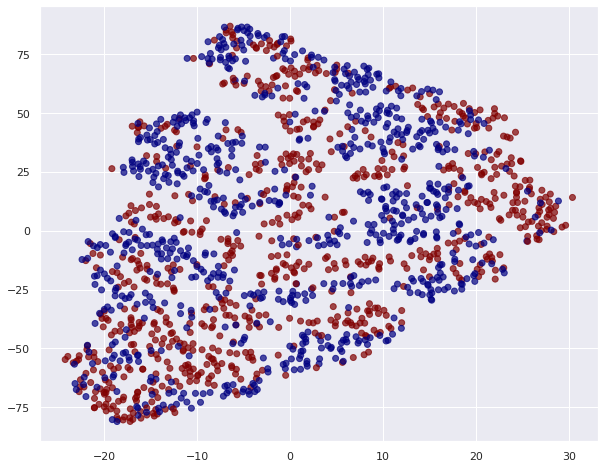

In [57]:
# draw the points
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_Class))}
node_colours = [label_map[target] for target in node_Class]

plt.figure(figsize=(10, 8))
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)

### Node embeddings

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
import seaborn as sns

In [59]:
X=node_emb.drop(['Class'],axis=1)
Y=node_emb['Class']

## Model Building

### CROSS VALIDATION

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.svm import LinearSVC
models = LinearSVC()
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    models.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(models.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Accuracy:  0.85125
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       800
           1       0.85      0.85      0.85       800

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600

Confusion matrix:  [[684 116]
 [122 678]]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [62]:
from sklearn.linear_model import PassiveAggressiveClassifier
pag=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    pag.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(pag.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.71875
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       800
           1       0.70      0.77      0.73       800

    accuracy                           0.72      1600
   macro avg       0.72      0.72      0.72      1600
weighted avg       0.72      0.72      0.72      1600

Confusion matrix:  [[534 266]
 [184 616]]


In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000) 
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lr.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lr.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.824375
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       800
           1       0.82      0.82      0.82       800

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600

Confusion matrix:  [[660 140]
 [141 659]]


In [64]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
rf = RandomForestClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    rf.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(rf.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.820625
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       800
           1       0.82      0.81      0.82       800

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600

Confusion matrix:  [[661 139]
 [148 652]]


In [65]:
gbc = GradientBoostingClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    gbc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(gbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.828125
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       800
           1       0.84      0.82      0.83       800

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600

Confusion matrix:  [[671 129]
 [146 654]]


In [66]:
abc = AdaBoostClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    abc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(abc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.80125
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       800
           1       0.80      0.80      0.80       800

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600

Confusion matrix:  [[644 156]
 [162 638]]


In [67]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    xgbc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(xgbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.825
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       800
           1       0.82      0.83      0.83       800

    accuracy                           0.82      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.83      0.82      0.82      1600

Confusion matrix:  [[659 141]
 [139 661]]


In [68]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lgb.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lgb.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8325
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       800
           1       0.84      0.82      0.83       800

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600

Confusion matrix:  [[673 127]
 [141 659]]


### Train - test split (Without cross validation)

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

In [70]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
pa.fit(x_train, y_train)
y_pred=pa.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[116  44]
 [ 12 148]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.81       160
           1       0.77      0.93      0.84       160

    accuracy                           0.82       320
   macro avg       0.84      0.82      0.82       320
weighted avg       0.84      0.82      0.82       320

accuracy_score:  0.825


In [71]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
y_pred=lsvm.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[138  22]
 [ 17 143]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       160
           1       0.87      0.89      0.88       160

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320

accuracy_score:  0.878125


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[130  30]
 [ 28 132]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       160
           1       0.81      0.82      0.82       160

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320

accuracy_score:  0.81875


In [73]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
xgbc.fit(x_train, y_train)
y_pred=xgbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[134  26]
 [ 23 137]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       160
           1       0.84      0.86      0.85       160

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320

accuracy_score:  0.846875


In [74]:
log = LogisticRegression(max_iter=10000) 
log.fit(x_train, y_train)
y_pred=log.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[130  30]
 [ 24 136]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       160
           1       0.82      0.85      0.83       160

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320

accuracy_score:  0.83125


In [75]:
gbc = GradientBoostingClassifier(n_estimators=300)
gbc.fit(x_train, y_train)
y_pred=gbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[130  30]
 [ 25 135]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       160
           1       0.82      0.84      0.83       160

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320

accuracy_score:  0.828125


In [76]:
abc = AdaBoostClassifier(n_estimators=300)
abc.fit(x_train, y_train)
y_pred=abc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[135  25]
 [ 29 131]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       160
           1       0.84      0.82      0.83       160

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320

accuracy_score:  0.83125


In [77]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb.fit(x_train, y_train)
y_pred=lgb.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[137  23]
 [ 23 137]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       160
           1       0.86      0.86      0.86       160

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320

accuracy_score:  0.85625
